### Problem Statement :

X Education offers online courses for professionals in the industry. The company promotes its courses on various websites and search engines such as Google. When individuals arrive on the website, they may look through the courses, submit a form for a course, or view videos. If these individuals submit a form with their email address or phone number, they are considered a lead. Additionally, the company receives leads from previous recommendations.
After obtaining these leads, the sales team at X education begins contacting them through calls, emails, and other methods. While some leads are converted during this process, the majority do not result in a conversion. On average, the lead conversion rate at X education is approximately 30%.

### Business Goal :

X Education requires assistance in identifying the most prospective leads, specifically those that have a high likelihood of becoming paying customers.
clients.
The company requires a system where each lead is given a lead score, ensuring that customers with higher lead scores are prioritized.
Customers with higher scores are more likely to convert, while those with lower scores have a lower chance of converting.
The CEO has estimated the target lead conversion rate to be approximately 80%.

### The objectives of the case study:
To construct a logistic regression model for assigning a lead score ranging from 0 to 100 to every lead, enabling the company to focus on potential leads.
In the future, you may need to adapt if the company's requirements change, so it is important to be prepared. The target lead conversion rate is estimated to be approximately 80%.

### Steps :

1. Read the data and comprehend it
2. Remove any unnecessary information from the data.
3. Get the data ready for constructing the model.
4. Constructing Models
5.Evaluation of the Model
6. Predicting outcomes on the test dataset.

In [1]:

import warnings
warnings.filterwarnings('ignore')

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve

In [4]:

df_lead=pd.read_csv(r"C:\Users\sagar\Downloads\Leads.csv")

In [5]:

df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [6]:

df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [7]:

df_lead.shape

(9240, 37)

In [8]:

df_lead.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0
TotalVisits,9103.0,3.445238,4.854853,0.0,1.0,3.0,5.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,2272.0
Page Views Per Visit,9103.0,2.362820,2.161418,0.0,1.0,2.0,3.00,55.0
Asymmetrique Activity Score,5022.0,14.306252,1.386694,7.0,14.0,14.0,15.00,18.0
Asymmetrique Profile Score,5022.0,16.344883,1.811395,11.0,15.0,16.0,18.00,20.0


In [9]:

df_lead.duplicated().sum()

0

In [10]:

percent_null = round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2).sort_values(ascending=False)
print(percent_null)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [11]:

df_lead.columns[(df_lead=='Select').any(axis=0)]

Index(['Specialization', 'How did you hear about X Education', 'Lead Profile',
       'City'],
      dtype='object')

In [12]:


df_lead['Specialization'] = df_lead['Specialization'].replace('Select', np.nan)

df_lead['How did you hear about X Education'] = df_lead['How did you hear about X Education'].replace('Select', np.nan)

df_lead['Lead Profile'] = df_lead['Lead Profile'].replace('Select', np.nan)

df_lead['City'] = df_lead['City'].replace('Select', np.nan)

In [13]:


percent_null = round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2).sort_values(ascending=False)
print(percent_null)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [14]:

col_to_drop=df_lead.loc[:,list(round((100*df_lead.isnull().sum()/df_lead.shape[0]),2)>30)].columns
col_to_drop

Index(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'],
      dtype='object')

In [15]:

df_lead = df_lead.drop(['Specialization', 'How did you hear about X Education', 'Tags',
       'Lead Quality', 'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score'], axis=1)

In [16]:


percent_null = round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2).sort_values(ascending=False)
print(percent_null)

What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
Prospect ID                                       0.00
Newspaper Article                                 0.00
Magazine  

In [17]:

df_lead.Country.value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

In [18]:

df_lead = df_lead.drop(['Country'], axis=1)

In [19]:

df_lead['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [20]:
df_lead['What is your current occupation']=df_lead['What is your current occupation'].replace(np.nan, 'No Information')

In [21]:

df_lead['What is your current occupation'].value_counts()

Unemployed              5600
No Information          2690
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

In [22]:

df_lead['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [23]:

df_lead = df_lead.drop(['What matters most to you in choosing a course'], axis=1)

In [24]:

df_lead['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [25]:

df_lead['Lead Source'] = df_lead['Lead Source'].replace('google', 'Google')

In [26]:

df_lead['Lead Source'] = df_lead['Lead Source'].replace(np.nan, 'Others')

In [27]:

df_lead['TotalVisits'].value_counts()

0.0      2189
2.0      1680
3.0      1306
4.0      1120
5.0       783
6.0       466
1.0       395
7.0       309
8.0       224
9.0       164
10.0      114
11.0       86
13.0       48
12.0       45
14.0       36
16.0       21
15.0       18
17.0       16
18.0       15
20.0       12
19.0        9
21.0        6
23.0        6
24.0        5
25.0        5
27.0        5
22.0        3
29.0        2
28.0        2
26.0        2
141.0       1
55.0        1
30.0        1
43.0        1
74.0        1
41.0        1
54.0        1
115.0       1
251.0       1
32.0        1
42.0        1
Name: TotalVisits, dtype: int64

In [28]:

df_lead['TotalVisits'].median()

3.0

In [29]:

df_lead['TotalVisits'] = df_lead['TotalVisits'].replace(np.nan, df_lead['TotalVisits'].median())

In [30]:

df_lead['Page Views Per Visit'].value_counts()

0.00    2189
2.00    1795
3.00    1196
4.00     896
1.00     651
        ... 
3.43       1
2.56       1
6.33       1
1.64       1
2.08       1
Name: Page Views Per Visit, Length: 114, dtype: int64

In [31]:

df_lead['Page Views Per Visit'].median()

2.0

In [32]:

df_lead['Page Views Per Visit'] = df_lead['Page Views Per Visit'].replace(np.nan, df_lead['Page Views Per Visit'].median())

In [33]:

df_lead['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [34]:

df_lead['Last Activity'] = df_lead['Last Activity'].replace(np.nan, 'Others')

In [35]:

percent_null = round(100*(df_lead.isnull().sum()/len(df_lead.index)), 2).sort_values(ascending=False)
print(percent_null)

Prospect ID                                 0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
I agree to pay the amount through cheque    0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Search                                      0.0
Lead Number                                 0.0
What is your current occupation             0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

In [36]:
lead_cat_col = df_lead.loc[:, df_lead.dtypes == 'object']
for i in lead_cat_col:
    print(df_lead[i].astype('category').value_counts())
    print('********************************************')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
********************************************
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
********************************************
Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
Ot

In [37]:

df_lead = df_lead.drop(['Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 
                          'Get updates on DM Content', 'I agree to pay the amount through cheque'], axis=1)

In [38]:

df_lead.shape

(9240, 20)

In [39]:

df_lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Prospect ID                             9240 non-null   object 
 1   Lead Number                             9240 non-null   int64  
 2   Lead Origin                             9240 non-null   object 
 3   Lead Source                             9240 non-null   object 
 4   Do Not Email                            9240 non-null   object 
 5   Do Not Call                             9240 non-null   object 
 6   Converted                               9240 non-null   int64  
 7   TotalVisits                             9240 non-null   float64
 8   Total Time Spent on Website             9240 non-null   int64  
 9   Page Views Per Visit                    9240 non-null   float64
 10  Last Activity                           9240 non-null   obje

In [40]:

df_lead.describe(percentiles=[.25,.5,.75,.90,.95,.99]).transpose()

,count,mean,std,min,25%,50%,75%,90%,95%,99%,max
Lead Number,9240.0,617188.435606,23405.995698,579533.0,596484.5,615479.0,637387.25,650506.1,655404.05,659592.98,660737.0
Converted,9240.0,0.385390,0.486714,0.0,0.0,0.0,1.00,1.0,1.00,1.00,1.0
TotalVisits,9240.0,3.438636,4.819024,0.0,1.0,3.0,5.00,7.0,10.00,17.00,251.0
Total Time Spent on Website,9240.0,487.698268,548.021466,0.0,12.0,248.0,936.00,1380.0,1562.00,1840.61,2272.0
Page Views Per Visit,9240.0,2.357440,2.145781,0.0,1.0,2.0,3.00,5.0,6.00,9.00,55.0


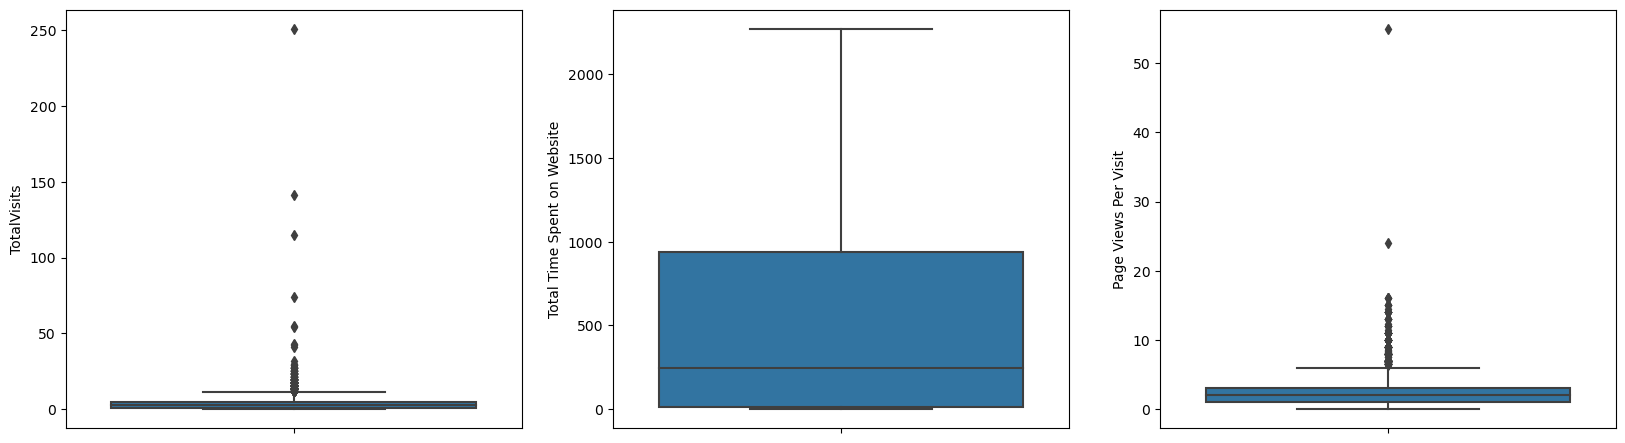

In [41]:

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = df_lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website',  data = df_lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit', data = df_lead)
plt.show()


In [42]:

total_visits_quantile = df_lead['TotalVisits'].quantile(0.99)
df_lead = df_lead[df_lead["TotalVisits"] < total_visits_quantile]

In [43]:

pages_per_visits_quantile = df_lead['Page Views Per Visit'].quantile(0.99)
df_lead = df_lead[df_lead["Page Views Per Visit"] < pages_per_visits_quantile]

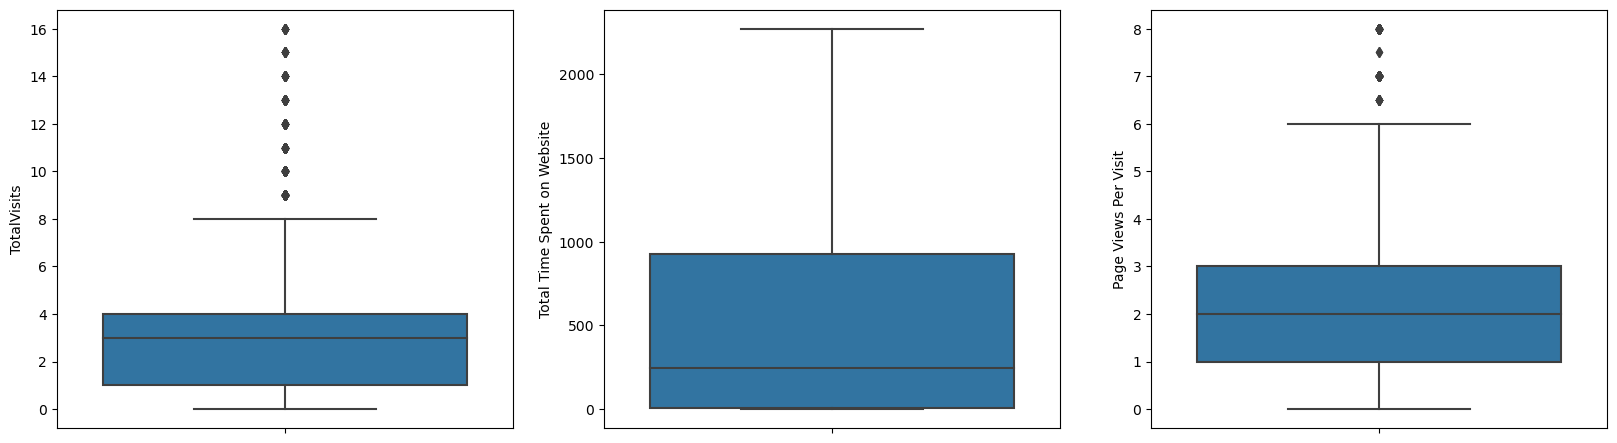

In [44]:

plt.figure(figsize=(20, 25))
plt.subplot(4,3,1)
sns.boxplot(y = 'TotalVisits', data = df_lead)
plt.subplot(4,3,2)
sns.boxplot(y = 'Total Time Spent on Website',  data = df_lead)
plt.subplot(4,3,3)
sns.boxplot(y = 'Page Views Per Visit',  data = df_lead)
plt.show()

In [45]:

df_lead.Converted.value_counts()

0    5552
1    3477
Name: Converted, dtype: int64

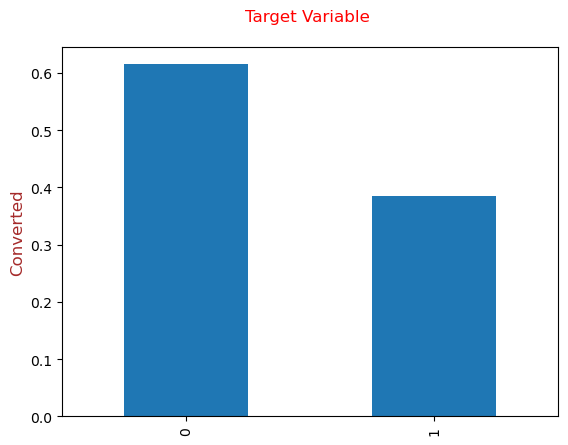

In [46]:
plt.title("Target Variable \n", fontdict={'fontsize': 12, 'fontweight' : 2, 'color' : 'Red'})
plt.ylabel("Converted", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
df_lead.Converted.value_counts(normalize=True).plot.bar()
plt.show()

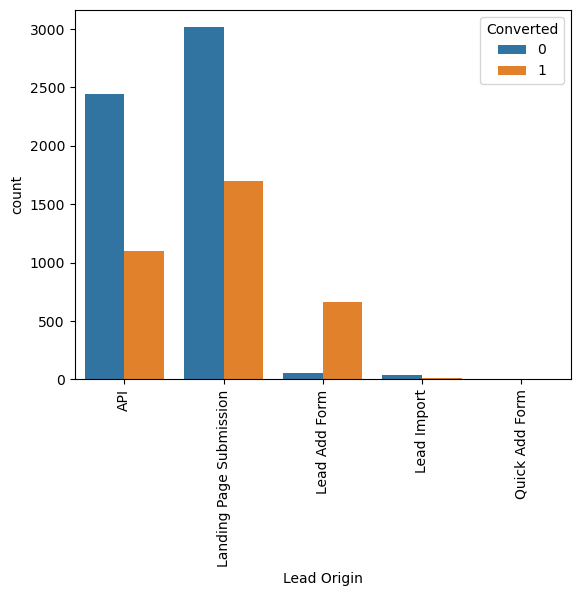

In [47]:

sns.countplot(x = "Lead Origin", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

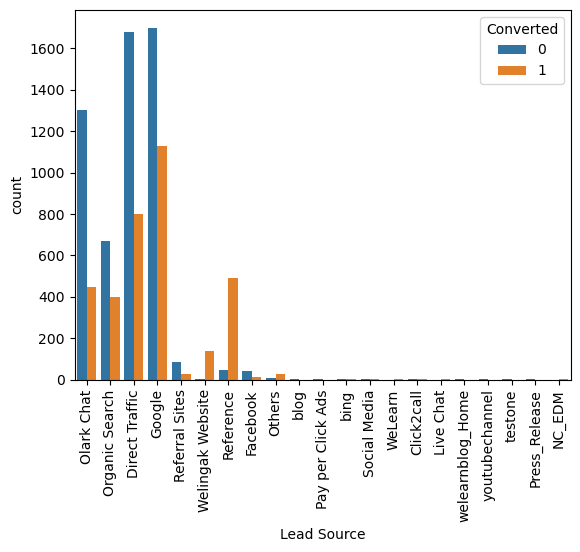

In [48]:

sns.countplot(x = "Lead Source", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

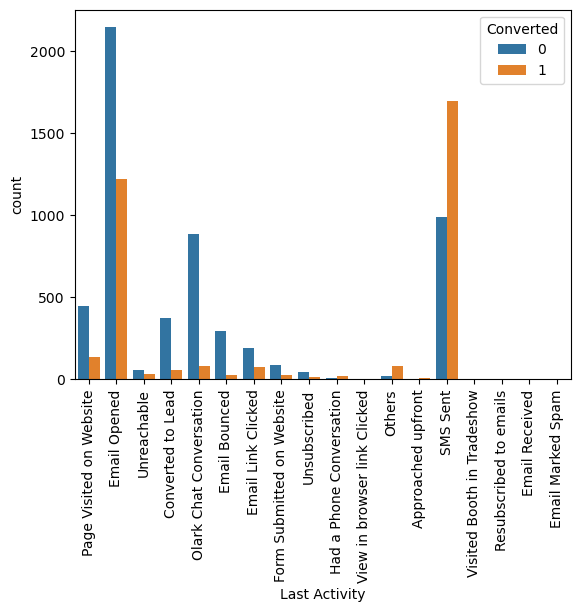

In [49]:

sns.countplot(x = "Last Activity", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

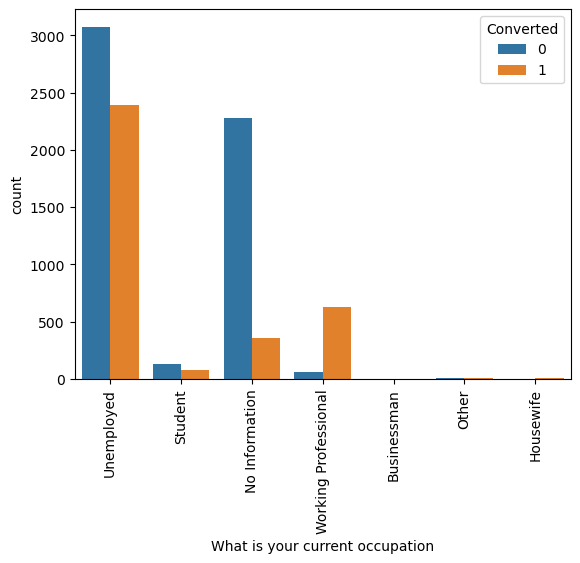

In [50]:

sns.countplot(x = "What is your current occupation", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

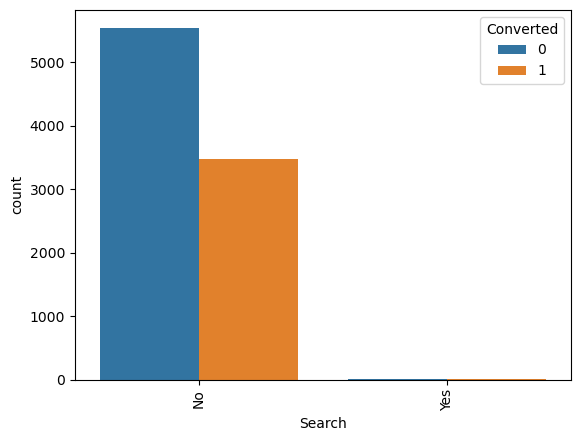

In [51]:

sns.countplot(x = "Search", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

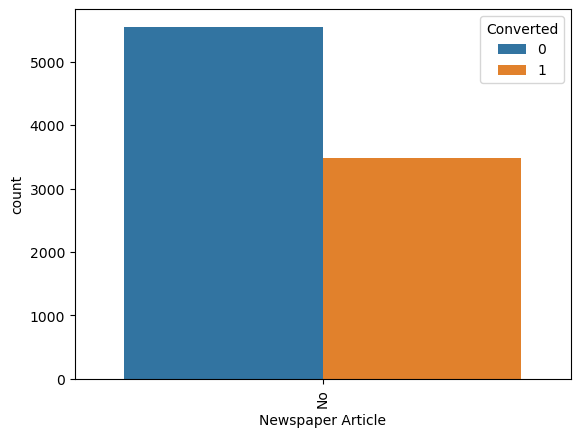

In [52]:

sns.countplot(x = "Newspaper Article", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

In [53]:

df_lead = df_lead.drop(['Newspaper Article'], axis=1)

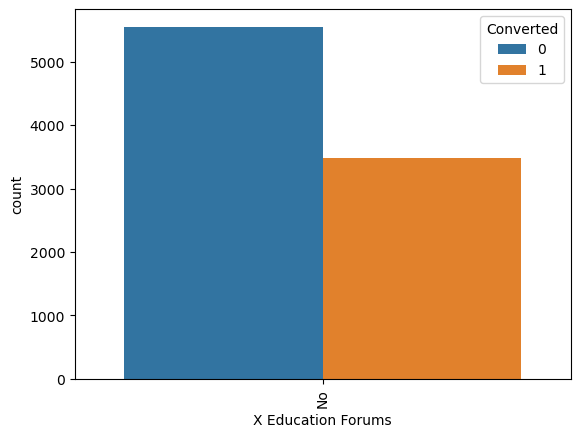

In [54]:

sns.countplot(x = "X Education Forums", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

In [55]:


df_lead = df_lead.drop(['X Education Forums'], axis=1)

In [56]:

df_lead.Newspaper.value_counts()

No     9028
Yes       1
Name: Newspaper, dtype: int64

In [57]:

df_lead = df_lead.drop(['Newspaper'], axis=1)

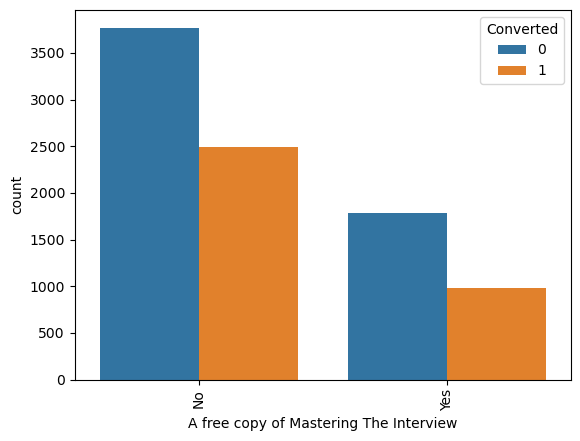

In [58]:

sns.countplot(x = "A free copy of Mastering The Interview", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

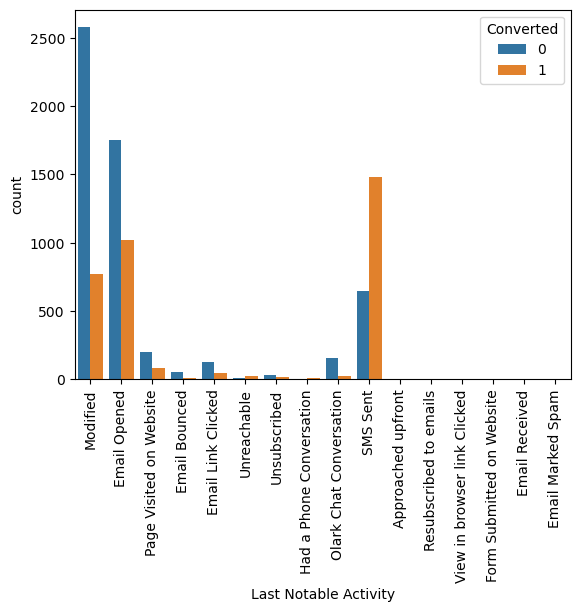

In [59]:

sns.countplot(x = "Last Notable Activity", hue = "Converted", data = df_lead)
plt.xticks(rotation = 90)
plt.show()

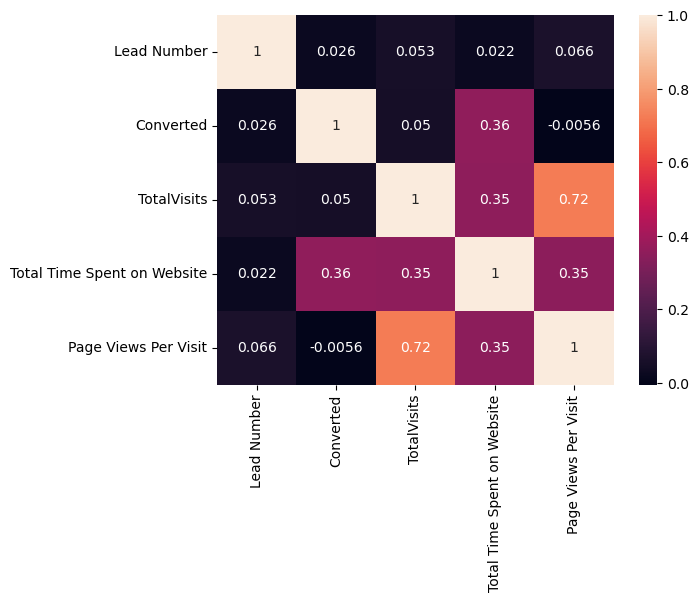

In [60]:
sns.heatmap(df_lead.corr(),annot=True)
plt.show()

In [61]:
var_list=['Do Not Email', 'Do Not Call', 'Search', 'Digital Advertisement', 
          'Through Recommendations', 'A free copy of Mastering The Interview']


def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

df_lead[var_list] = df_lead[var_list].apply(binary_map)

In [62]:

df_lead[var_list].head()

,Do Not Email,Do Not Call,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,1
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [63]:
df_lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,What is your current occupation,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0,0.0,0,0.0,Page Visited on Website,Unemployed,0,0,0,0,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,0,5.0,674,2.5,Email Opened,Unemployed,0,0,0,0,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,1,2.0,1532,2.0,Email Opened,Student,0,0,0,1,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,0,1.0,305,1.0,Unreachable,Unemployed,0,0,0,0,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,1,2.0,1428,1.0,Converted to Lead,Unemployed,0,0,0,0,Modified


In [64]:


d_lead_origin = pd.get_dummies(df_lead['Lead Origin'], prefix='LeadOrigin')

d_lead_origin1 = d_lead_origin.drop(['LeadOrigin_Quick Add Form'], 1)

df_lead = pd.concat([df_lead, d_lead_origin1], axis = 1)


d_lead_source = pd.get_dummies(df_lead['Lead Source'], prefix='LeadSource')

d_lead_source1 = d_lead_source.drop(['LeadSource_NC_EDM'], 1)

df_lead = pd.concat([df_lead,d_lead_source1], axis=1)



d_last_activity = pd.get_dummies(df_lead['Last Activity'], prefix='LastActivity')

d_last_activity1 = d_last_activity.drop(['LastActivity_Resubscribed to emails'], 1)

df_lead = pd.concat([df_lead,d_last_activity1], axis=1)



d_curr_occupation = pd.get_dummies(df_lead['What is your current occupation'], prefix='CurrentOccupation')

d_curr_occupation1 = d_curr_occupation.drop(['CurrentOccupation_Businessman'], 1)

df_lead = pd.concat([df_lead,d_curr_occupation1], axis=1)



d_last_notable_activity = pd.get_dummies(df_lead['Last Notable Activity'], prefix='LastNotableActivity')

d_last_notable_activity1 = d_last_notable_activity.drop(['LastNotableActivity_Resubscribed to emails'], 1)

df_lead = pd.concat([df_lead,d_last_notable_activity1], axis=1)

In [65]:

df_lead = df_lead.drop(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Last Activity',
                          'What is your current occupation', 'Last Notable Activity'], axis=1)

In [66]:
df_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9029 entries, 0 to 9239
Data columns (total 72 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Do Not Email                                      9029 non-null   int64  
 1   Do Not Call                                       9029 non-null   int64  
 2   Converted                                         9029 non-null   int64  
 3   TotalVisits                                       9029 non-null   float64
 4   Total Time Spent on Website                       9029 non-null   int64  
 5   Page Views Per Visit                              9029 non-null   float64
 6   Search                                            9029 non-null   int64  
 7   Digital Advertisement                             9029 non-null   int64  
 8   Through Recommendations                           9029 non-null   int64  
 9   A free copy of Mast

In [67]:

df_lead.shape

(9029, 72)

In [68]:

X = df_lead.drop(['Converted'], axis=1)
X.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
0,0,0,0.0,0,0.0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,0,5.0,674,2.5,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,2.0,1532,2.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1.0,305,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,2.0,1428,1.0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [69]:

y = df_lead['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [70]:

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=42)

In [71]:
scaler = MinMaxScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,LeadOrigin_API,...,LastNotableActivity_Email Received,LastNotableActivity_Form Submitted on Website,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Olark Chat Conversation,LastNotableActivity_Page Visited on Website,LastNotableActivity_SMS Sent,LastNotableActivity_Unreachable,LastNotableActivity_Unsubscribed,LastNotableActivity_View in browser link Clicked
2240,0,0,0.1875,0.898963,0.375,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
113,0,0,0.3125,0.706360,0.625,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
4132,0,0,0.3750,0.768155,0.750,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5573,0,0,0.1250,0.028868,0.250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1109,0,0,0.0625,0.009021,0.125,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [72]:

logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6258
Model Family:                Binomial   Df Model:                           61
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 06 Apr 2024   Deviance:                   1.6358e+05
Time:                        14:32:21   Pearson chi2:                 8.00e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                             4.927e+15   6.69e+07   7.37e+07      0.000    4.93e+15    4.93e+15
Do Not Email                                      -5.03e+14   4.48e+06  -1.12e+08      0.000   -5.03e+14   -5.03e+14
Do Not Call                                       5.755e+15   4.76e+07   1.21e+08      0.000    5.76e+15    5.76e+15
TotalVisits                                       1.416e+15   7.66e+06   1.85e+08      0.000    1.42e+15    1.42e+15
Total Time Spent on Website                      -3.074e+14   4.02e+06  -7.66e+07      0.000   -3.07e+14   -3.07e+14
Page Views Per Visit                             -4.137e+14   6.53e+06  -6.33e+07      0.000   -4.14e+14   -4.14e+14
Search                                           -1.101e+15   2.44e+07  -4.51e+07      0.000    -1.1e+15    -1.1e+15
Digital Advertisement                             3.274e+14   4.76e+07   6.88e+06      0.000    3.27e+14    3.27e+14
Through Recommendations                           4.041e+13    4.2e+07   9.61e+05      0.000    4.04e+13    4.04e+13
A free copy of Mastering The Interview            2.037e+13   2.69e+06   7.56e+06      0.000    2.04e+13    2.04e+13
LeadOrigin_API                                   -6.875e+15   7.51e+07  -9.16e+07      0.000   -6.87e+15   -6.87e+15
LeadOrigin_Landing Page Submission               -7.029e+15   7.51e+07  -9.37e+07      0.000   -7.03e+15   -7.03e+15
LeadOrigin_Lead Add Form                         -4.804e+15   6.87e+07  -6.99e+07      0.000    -4.8e+15    -4.8e+15
LeadOrigin_Lead Import                           -8.603e+15   8.43e+07  -1.02e+08      0.000    -8.6e+15    -8.6e+15
LeadSource_Click2call                             2.735e+15   5.01e+07   5.46e+07      0.000    2.74e+15    2.74e+15
LeadSource_Direct Traffic                         1.127e+15    1.6e+07   7.05e+07      0.000    1.13e+15    1.13e+15
LeadSource_Facebook                               4.007e+14   4.65e+07   8.62e+06      0.000    4.01e+14    4.01e+14
LeadSource_Google                                 1.123e+15   1.59e+07   7.06e+07      0.000    1.12e+15    1.12e+15
LeadSource_Live Chat                              2.999e+15   5.01e+07   5.99e+07      0.000       3e+15       3e+15
LeadSource_Olark Chat                             2.115e+15    1.6e+07   1.32e+08      0.000    2.12e+15    2.12e+15
LeadSource_Organic Search                         1.078e+15   1.61e+07    6.7e+07      0.000    1.08e+15    1.08e+15
LeadSource_Others                                 1.149e+15    2.4e+07   4.79e+07      0.000    1.15e+15    1.15e+15
LeadSource_Pay per Click Ads                        -7.8430   2.31e-07  -3.39e+07      0.000      -7.843      -7.843
LeadSource_Press_Release                 

In [73]:
logreg = LogisticRegression()

In [74]:
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)

In [75]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 13),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Search', True, 1),
 ('Digital Advertisement', False, 46),
 ('Through Recommendations', False, 31),
 ('A free copy of Mastering The Interview', False, 37),
 ('LeadOrigin_API', False, 9),
 ('LeadOrigin_Landing Page Submission', False, 8),
 ('LeadOrigin_Lead Add Form', True, 1),
 ('LeadOrigin_Lead Import', False, 19),
 ('LeadSource_Click2call', False, 28),
 ('LeadSource_Direct Traffic', False, 16),
 ('LeadSource_Facebook', False, 10),
 ('LeadSource_Google', False, 22),
 ('LeadSource_Live Chat', False, 38),
 ('LeadSource_Olark Chat', True, 1),
 ('LeadSource_Organic Search', False, 21),
 ('LeadSource_Others', False, 42),
 ('LeadSource_Pay per Click Ads', False, 50),
 ('LeadSource_Press_Release', False, 51),
 ('LeadSource_Reference', True, 1),
 ('LeadSource_Referral Sites', False, 20),
 ('LeadSource_Social Media', False, 40),
 (

In [76]:


col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Search', 'LeadOrigin_Lead Add Form',
       'LeadSource_Olark Chat', 'LeadSource_Reference',
       'LeadSource_Welingak Website', 'LastActivity_Approached upfront',
       'LastActivity_Email Opened', 'LastActivity_Had a Phone Conversation',
       'LastActivity_Olark Chat Conversation', 'LastActivity_SMS Sent',
       'CurrentOccupation_Housewife', 'CurrentOccupation_No Information',
       'CurrentOccupation_Working Professional',
       'LastNotableActivity_Had a Phone Conversation',
       'LastNotableActivity_Modified', 'LastNotableActivity_Unreachable'],
      dtype='object')

In [77]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6299
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2501.1
Date:                Sat, 06 Apr 2024   Deviance:                       5002.3
Time:                        14:32:23   Pearson chi2:                 6.53e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4205
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5570      0.153    -16.659      0.000      -2.858      -2.256
Do Not Email                                    -1.1023      0.176     -6.276      0.000      -1.447      -0.758
TotalVisits                                      1.7989      0.290      6.206      0.000       1.231       2.367
Total Time Spent on Website                      4.5119      0.169     26.717      0.000       4.181       4.843
Page Views Per Visit                            -0.8642      0.250     -3.453      0.001      -1.355      -0.374
Search                                          -1.6356      1.011     -1.618      0.106      -3.617       0.346
LeadOrigin_Lead Add Form                         3.0358      0.512      5.932      0.000       2.033       4.039
LeadSource_Olark Chat                            1.4699      0.134     10.947      0.000       1.207       1.733
LeadSource_Reference                             0.6403      0.540      1.185      0.236      -0.418       1.699
LeadSource_Welingak Website                      2.6586      0.876      3.036      0.002       0.942       4.375
LastActivity_Approached upfront                 23.9469   2.63e+04      0.001      0.999   -5.16e+04    5.17e+04
LastActivity_Email Opened                        0.5394      0.117      4.599      0.000       0.310       0.769
LastActivity_Had a Phone Conversation            1.1718      0.939      1.248      0.212      -0.668       3.011
LastActivity_Olark Chat Conversation            -0.5893      0.190     -3.101      0.002      -0.962      -0.217
LastActivity_SMS Sent                            1.7403      0.118     14.697      0.000       1.508       1.972
CurrentOccupation_Housewife                     23.9667   2.43e+04      0.001      0.999   -4.76e+04    4.76e+04
CurrentOccupation_No Information                -1.2346      0.090    -13.681      0.000      -1.411      -1.058
CurrentOccupation_Working Professional           2.6225      0.203     12.889      0.000       2.224       3.021
LastNotableActivity_Had a Phone Conversation     2.3799      1.501      1.585      0.113      -0.562       5.322
LastNotableActivity_Modified                    -0.5521      0.090     -6.131      0.000      -0.729      -0.376
LastNotableActivity_Unreachable                  2.0387      0.556      3.665      0.000       0.948       3.129
================================================================================================================
"""

Removing column LastActivity_Approached_Upfront as it has a high pvalue and hence is insignificant.

In [78]:
#removing the column
col = col.drop('LastActivity_Approached upfront',1)

#### Rebuilding Model : 3

In [79]:
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2506.6
Date:                Sat, 06 Apr 2024   Deviance:                       5013.2
Time:                        14:32:23   Pearson chi2:                 6.53e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4195
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5414      0.153    -16.608      0.000      -2.841      -2.241
Do Not Email                                    -1.1140      0.175     -6.350      0.000      -1.458      -0.770
TotalVisits                                      1.7878      0.290      6.171      0.000       1.220       2.356
Total Time Spent on Website                      4.5173      0.169     26.768      0.000       4.187       4.848
Page Views Per Visit                            -0.8483      0.250     -3.393      0.001      -1.338      -0.358
Search                                          -1.6363      1.012     -1.617      0.106      -3.620       0.347
LeadOrigin_Lead Add Form                         3.0402      0.511      5.946      0.000       2.038       4.042
LeadSource_Olark Chat                            1.4873      0.134     11.087      0.000       1.224       1.750
LeadSource_Reference                             0.6399      0.540      1.186      0.236      -0.418       1.698
LeadSource_Welingak Website                      2.6555      0.875      3.034      0.002       0.940       4.371
LastActivity_Email Opened                        0.5164      0.117      4.424      0.000       0.288       0.745
LastActivity_Had a Phone Conversation            1.1429      0.939      1.218      0.223      -0.697       2.982
LastActivity_Olark Chat Conversation            -0.6220      0.190     -3.282      0.001      -0.994      -0.250
LastActivity_SMS Sent                            1.7182      0.118     14.579      0.000       1.487       1.949
CurrentOccupation_Housewife                     22.9568   1.47e+04      0.002      0.999   -2.88e+04    2.89e+04
CurrentOccupation_No Information                -1.2409      0.090    -13.758      0.000      -1.418      -1.064
CurrentOccupation_Working Professional           2.6161      0.203     12.868      0.000       2.218       3.015
LastNotableActivity_Had a Phone Conversation     2.3908      1.501      1.592      0.111      -0.552       5.333
LastNotableActivity_Modified                    -0.5431      0.090     -6.041      0.000      -0.719      -0.367
LastNotableActivity_Unreachable                  2.0197      0.556      3.630      0.000       0.929       3.110
================================================================================================================
"""

In [80]:

col = col.drop('CurrentOccupation_Housewife',1)

In [81]:
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6301
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2513.3
Date:                Sat, 06 Apr 2024   Deviance:                       5026.7
Time:                        14:32:24   Pearson chi2:                 6.54e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4183
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5270      0.153    -16.565      0.000      -2.826      -2.228
Do Not Email                                    -1.1188      0.175     -6.380      0.000      -1.463      -0.775
TotalVisits                                      1.7768      0.289      6.139      0.000       1.210       2.344
Total Time Spent on Website                      4.5123      0.169     26.772      0.000       4.182       4.843
Page Views Per Visit                            -0.8528      0.250     -3.414      0.001      -1.342      -0.363
Search                                          -1.6358      1.011     -1.619      0.106      -3.617       0.345
LeadOrigin_Lead Add Form                         3.0313      0.511      5.930      0.000       2.029       4.033
LeadSource_Olark Chat                            1.4768      0.134     11.028      0.000       1.214       1.739
LeadSource_Reference                             0.6579      0.539      1.220      0.223      -0.399       1.715
LeadSource_Welingak Website                      2.6524      0.875      3.030      0.002       0.937       4.368
LastActivity_Email Opened                        0.5166      0.116      4.440      0.000       0.289       0.745
LastActivity_Had a Phone Conversation            1.1276      0.939      1.201      0.230      -0.712       2.967
LastActivity_Olark Chat Conversation            -0.6290      0.189     -3.322      0.001      -1.000      -0.258
LastActivity_SMS Sent                            1.7107      0.118     14.551      0.000       1.480       1.941
CurrentOccupation_No Information                -1.2457      0.090    -13.822      0.000      -1.422      -1.069
CurrentOccupation_Working Professional           2.6078      0.203     12.834      0.000       2.210       3.006
LastNotableActivity_Had a Phone Conversation     2.3999      1.501      1.598      0.110      -0.543       5.343
LastNotableActivity_Modified                    -0.5378      0.090     -5.995      0.000      -0.714      -0.362
LastNotableActivity_Unreachable                  2.0149      0.556      3.621      0.000       0.924       3.105
================================================================================================================
"""

In [82]:

col = col.drop('LastActivity_Had a Phone Conversation',1)

In [83]:
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6302
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.1
Date:                Sat, 06 Apr 2024   Deviance:                       5028.2
Time:                        14:32:24   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4181
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5174      0.152    -16.541      0.000      -2.816      -2.219
Do Not Email                                    -1.1242      0.175     -6.414      0.000      -1.468      -0.781
TotalVisits                                      1.7711      0.289      6.122      0.000       1.204       2.338
Total Time Spent on Website                      4.5135      0.169     26.784      0.000       4.183       4.844
Page Views Per Visit                            -0.8513      0.250     -3.409      0.001      -1.341      -0.362
Search                                          -1.6344      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.0307      0.511      5.931      0.000       2.029       4.032
LeadSource_Olark Chat                            1.4756      0.134     11.022      0.000       1.213       1.738
LeadSource_Reference                             0.6636      0.539      1.231      0.219      -0.393       1.721
LeadSource_Welingak Website                      2.6507      0.875      3.029      0.002       0.935       4.366
LastActivity_Email Opened                        0.5072      0.116      4.373      0.000       0.280       0.735
LastActivity_Olark Chat Conversation            -0.6397      0.189     -3.383      0.001      -1.010      -0.269
LastActivity_SMS Sent                            1.7015      0.117     14.517      0.000       1.472       1.931
CurrentOccupation_No Information                -1.2474      0.090    -13.845      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6117      0.203     12.860      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5194      1.177      2.989      0.003       1.212       5.827
LastNotableActivity_Modified                    -0.5343      0.090     -5.961      0.000      -0.710      -0.359
LastNotableActivity_Unreachable                  2.0066      0.556      3.606      0.000       0.916       3.097
================================================================================================================
"""

In [84]:

col = col.drop('LeadSource_Reference',1)

In [85]:
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6303
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2514.8
Date:                Sat, 06 Apr 2024   Deviance:                       5029.6
Time:                        14:32:24   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4180
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5134      0.152    -16.526      0.000      -2.811      -2.215
Do Not Email                                    -1.1458      0.175     -6.537      0.000      -1.489      -0.802
TotalVisits                                      1.7681      0.289      6.111      0.000       1.201       2.335
Total Time Spent on Website                      4.5139      0.168     26.791      0.000       4.184       4.844
Page Views Per Visit                            -0.8508      0.250     -3.407      0.001      -1.340      -0.361
Search                                          -1.6345      1.011     -1.617      0.106      -3.615       0.346
LeadOrigin_Lead Add Form                         3.6170      0.208     17.383      0.000       3.209       4.025
LeadSource_Olark Chat                            1.4744      0.134     11.013      0.000       1.212       1.737
LeadSource_Welingak Website                      2.0666      0.742      2.786      0.005       0.613       3.520
LastActivity_Email Opened                        0.5049      0.116      4.358      0.000       0.278       0.732
LastActivity_Olark Chat Conversation            -0.6424      0.189     -3.399      0.001      -1.013      -0.272
LastActivity_SMS Sent                            1.6972      0.117     14.497      0.000       1.468       1.927
CurrentOccupation_No Information                -1.2473      0.090    -13.844      0.000      -1.424      -1.071
CurrentOccupation_Working Professional           2.6144      0.203     12.880      0.000       2.217       3.012
LastNotableActivity_Had a Phone Conversation     3.5160      1.177      2.986      0.003       1.208       5.824
LastNotableActivity_Modified                    -0.5339      0.090     -5.958      0.000      -0.710      -0.358
LastNotableActivity_Unreachable                  2.0050      0.556      3.606      0.000       0.915       3.095
================================================================================================================
"""

In [86]:

col = col.drop('Search',1)

In [87]:
X_train_sm = sm.add_constant(X_train[col])
logm7 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm7.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6304
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2516.2
Date:                Sat, 06 Apr 2024   Deviance:                       5032.5
Time:                        14:32:24   Pearson chi2:                 6.28e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4177
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.5028      0.152    -16.475      0.000      -2.801      -2.205
Do Not Email                                    -1.1452      0.175     -6.536      0.000      -1.489      -0.802
TotalVisits                                      1.7397      0.289      6.023      0.000       1.174       2.306
Total Time Spent on Website                      4.5109      0.168     26.784      0.000       4.181       4.841
Page Views Per Visit                            -0.8591      0.250     -3.442      0.001      -1.348      -0.370
LeadOrigin_Lead Add Form                         3.6099      0.208     17.356      0.000       3.202       4.018
LeadSource_Olark Chat                            1.4653      0.134     10.951      0.000       1.203       1.728
LeadSource_Welingak Website                      2.0660      0.742      2.786      0.005       0.612       3.520
LastActivity_Email Opened                        0.5006      0.116      4.323      0.000       0.274       0.728
LastActivity_Olark Chat Conversation            -0.6438      0.189     -3.408      0.001      -1.014      -0.273
LastActivity_SMS Sent                            1.6955      0.117     14.489      0.000       1.466       1.925
CurrentOccupation_No Information                -1.2447      0.090    -13.822      0.000      -1.421      -1.068
CurrentOccupation_Working Professional           2.6123      0.203     12.869      0.000       2.214       3.010
LastNotableActivity_Had a Phone Conversation     3.5184      1.176      2.991      0.003       1.213       5.824
LastNotableActivity_Modified                    -0.5330      0.090     -5.949      0.000      -0.709      -0.357
LastNotableActivity_Unreachable                  2.0055      0.556      3.607      0.000       0.916       3.095
================================================================================================================
"""

In [88]:

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
3,Page Views Per Visit,6.11
1,TotalVisits,4.70
7,LastActivity_Email Opened,2.37
2,Total Time Spent on Website,2.14
9,LastActivity_SMS Sent,2.12
5,LeadSource_Olark Chat,2.10
13,LastNotableActivity_Modified,1.78
8,LastActivity_Olark Chat Conversation,1.76
4,LeadOrigin_Lead Add Form,1.62
10,CurrentOccupation_No Information,1.57


In [89]:

col = col.drop('Page Views Per Visit',1)

In [90]:
X_train_sm = sm.add_constant(X_train[col])
logm8 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm8.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6320
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2522.2
Date:                Sat, 06 Apr 2024   Deviance:                       5044.4
Time:                        14:32:24   Pearson chi2:                 6.30e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4166
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                           -2.6532      0.146    -18.185      0.000      -2.939      -2.367
Do Not Email                                    -1.1622      0.175     -6.649      0.000      -1.505      -0.820
TotalVisits                                      1.2254      0.247      4.954      0.000       0.741       1.710
Total Time Spent on Website                      4.5066      0.168     26.758      0.000       4.176       4.837
LeadOrigin_Lead Add Form                         3.7825      0.202     18.683      0.000       3.386       4.179
LeadSource_Olark Chat                            1.6450      0.124     13.263      0.000       1.402       1.888
LeadSource_Welingak Website                      2.0756      0.742      2.799      0.005       0.622       3.529
LastActivity_Email Opened                        0.4606      0.115      4.008      0.000       0.235       0.686
LastActivity_Olark Chat Conversation            -0.6504      0.188     -3.453      0.001      -1.020      -0.281
LastActivity_SMS Sent                            1.6433      0.116     14.213      0.000       1.417       1.870
CurrentOccupation_No Information                -1.2327      0.090    -13.734      0.000      -1.409      -1.057
CurrentOccupation_Working Professional           2.6138      0.203     12.876      0.000       2.216       3.012
LastNotableActivity_Had a Phone Conversation     3.4487      1.174      2.937      0.003       1.147       5.750
LastNotableActivity_Modified                    -0.5446      0.089     -6.095      0.000      -0.720      -0.369
LastNotableActivity_Unreachable                  1.9285      0.560      3.442      0.001       0.830       3.027
================================================================================================================
"""

In [91]:


vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,TotalVisits,2.63
2,Total Time Spent on Website,2.11
6,LastActivity_Email Opened,2.06
4,LeadSource_Olark Chat,1.94
8,LastActivity_SMS Sent,1.86
7,LastActivity_Olark Chat Conversation,1.75
12,LastNotableActivity_Modified,1.68
3,LeadOrigin_Lead Add Form,1.57
9,CurrentOccupation_No Information,1.57
5,LeadSource_Welingak Website,1.30


In [92]:

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2240    0.701779
113     0.591069
4132    0.765682
5573    0.129061
1109    0.013213
2282    0.030126
2976    0.869418
8431    0.460064
2770    0.739865
5790    0.995442
dtype: float64

In [93]:

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70177929, 0.59106932, 0.76568166, 0.12906116, 0.01321321,
       0.03012638, 0.86941758, 0.4600642 , 0.7398654 , 0.99544236])

In [94]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['LeadId'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId
0,0,0.701779,2240
1,0,0.591069,113
2,1,0.765682,4132
3,0,0.129061,5573
4,0,0.013213,1109


In [95]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted
0,0,0.701779,2240,1
1,0,0.591069,113,1
2,1,0.765682,4132,1
3,0,0.129061,5573,0
4,0,0.013213,1109,0


In [96]:
confusion_mat = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion_mat)

[[3413  445]
 [ 708 1754]]


In [97]:


print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8175632911392405


In [98]:
TP = confusion_mat[1,1] 
TN = confusion_mat[0,0] 
FP = confusion_mat[0,1]
FN = confusion_mat[1,0] 

In [99]:

TP / float(TP+FN)

0.7124289195775793

In [100]:

TN / float(TN+FP)

0.8846552617936755

In [101]:

print(FP/ float(TN+FP))

0.11534473820632452


In [102]:

print (TP / float(TP+FP))

0.7976352887676217


In [103]:

print (TN / float(TN+ FN))

0.8281970395535064


In [104]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [105]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_Prob, 
                                         drop_intermediate = False )

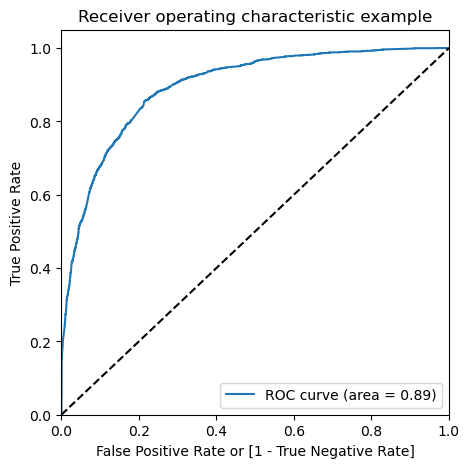

In [106]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

In [107]:

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0


In [108]:

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])


num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.389557  1.000000  0.000000
0.1   0.1  0.657278  0.972380  0.456195
0.2   0.2  0.760759  0.923233  0.657076
0.3   0.3  0.803165  0.878554  0.755054
0.4   0.4  0.815348  0.780260  0.837740
0.5   0.5  0.817563  0.712429  0.884655
0.6   0.6  0.808703  0.638911  0.917055
0.7   0.7  0.784810  0.530869  0.946864
0.8   0.8  0.763291  0.444354  0.966822
0.9   0.9  0.718987  0.299350  0.986781


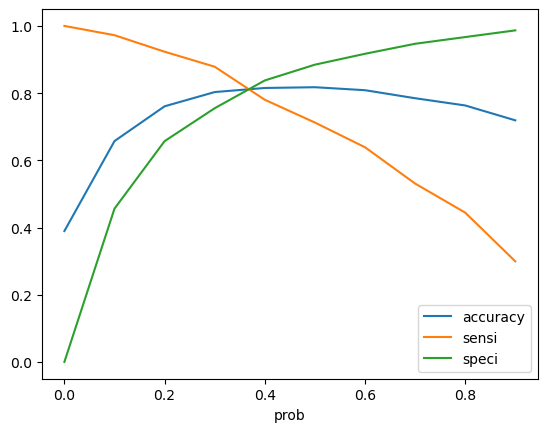

In [109]:

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

From the curve above, 0.37 is the optimum point to take it as a cutoff probability.

In [110]:


y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.37 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0,1
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0,1
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0,0


In [111]:


y_train_pred_final['lead_score'] = y_train_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_train_pred_final.head(20)

,Converted,Converted_Prob,LeadId,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted,lead_score
0,0,0.701779,2240,1,1,1,1,1,1,1,1,1,0,0,1,70
1,0,0.591069,113,1,1,1,1,1,1,1,0,0,0,0,1,59
2,1,0.765682,4132,1,1,1,1,1,1,1,1,1,0,0,1,77
3,0,0.129061,5573,0,1,1,0,0,0,0,0,0,0,0,0,13
4,0,0.013213,1109,0,1,0,0,0,0,0,0,0,0,0,0,1
5,0,0.030126,2282,0,1,0,0,0,0,0,0,0,0,0,0,3
6,1,0.869418,2976,1,1,1,1,1,1,1,1,1,1,0,1,87
7,0,0.460064,8431,0,1,1,1,1,1,0,0,0,0,0,1,46
8,1,0.739865,2770,1,1,1,1,1,1,1,1,1,0,0,1,74
9,1,0.995442,5790,1,1,1,1,1,1,1,1,1,1,1,1,100


In [112]:

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1975
0     487
Name: final_predicted, dtype: int64

In [113]:

1975/float(1975+487)

0.8021933387489846

In [114]:

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8136075949367089

In [115]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3167,  691],
       [ 487, 1975]], dtype=int64)

In [116]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [117]:

TP / float(TP+FN)

0.8021933387489846

In [118]:

TN / float(TN+FP)

0.8208916537065837

In [119]:

print(FP/ float(TN+FP))

0.17910834629341627


In [120]:

print (TP / float(TP+FP))

0.7408102025506377


In [121]:

print (TN / float(TN+ FN))

0.8667214012041599


In [122]:

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion

array([[3413,  445],
       [ 708, 1754]], dtype=int64)

In [123]:
precision_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7976352887676217

In [124]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.7124289195775793

In [125]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       1
 3       0
 4       0
        ..
 6315    1
 6316    1
 6317    0
 6318    0
 6319    0
 Name: Converted, Length: 6320, dtype: int64,
 0       1
 1       1
 2       1
 3       0
 4       0
        ..
 6315    0
 6316    1
 6317    0
 6318    0
 6319    0
 Name: predicted, Length: 6320, dtype: int64)

In [126]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

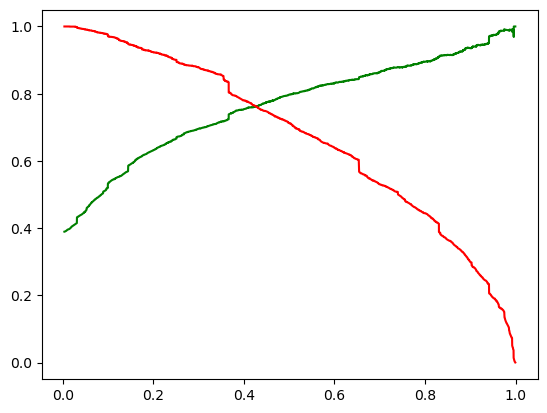

In [127]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [128]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                        'Total Time Spent on Website','Page Views Per Visit']])

In [129]:
X_test = X_test[col]
X_test.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,LeadOrigin_Lead Add Form,LeadSource_Olark Chat,LeadSource_Welingak Website,LastActivity_Email Opened,LastActivity_Olark Chat Conversation,LastActivity_SMS Sent,CurrentOccupation_No Information,CurrentOccupation_Working Professional,LastNotableActivity_Had a Phone Conversation,LastNotableActivity_Modified,LastNotableActivity_Unreachable
2296,0,0.1875,0.665313,0,0,0,0,0,1,0,0,0,0,0
8697,0,0.4375,0.184032,0,0,0,0,0,1,0,0,0,0,0
7378,0,0.1250,0.163284,0,0,0,1,0,0,0,0,0,0,0
8631,0,0.3125,0.407307,0,0,0,0,0,1,0,0,0,1,0
4799,0,0.5000,0.744700,0,0,0,0,0,1,0,0,0,0,0


In [130]:
X_test_sm = sm.add_constant(X_test)

In [131]:
y_test_pred = res.predict(X_test_sm)

In [132]:
y_test_pred[:10]

2296    0.901868
8697    0.587969
7378    0.213572
8631    0.660152
4799    0.950680
4503    0.354912
7129    0.872954
1717    0.144281
8398    0.867851
5116    0.251214
dtype: float64

In [133]:

y_pred_1 = pd.DataFrame(y_test_pred)

In [134]:

y_pred_1.head()

,0
2296,0.901868
8697,0.587969
7378,0.213572
8631,0.660152
4799,0.950680


In [135]:

y_test_df = pd.DataFrame(y_test)

In [136]:

y_test_df['LeadId'] = y_test_df.index

In [137]:

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [138]:

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [139]:
y_pred_final.head()

,Converted,LeadId,0
0,1,2296,0.901868
1,0,8697,0.587969
2,0,7378,0.213572
3,0,8631,0.660152
4,1,4799,0.950680


In [140]:

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_Prob'})

In [141]:

y_pred_final = y_pred_final.reindex(['LeadId','Converted','Converted_Prob'], axis=1)

In [142]:

y_pred_final.head()

,LeadId,Converted,Converted_Prob
0,2296,1,0.901868
1,8697,0,0.587969
2,7378,0,0.213572
3,8631,0,0.660152
4,4799,1,0.950680


In [143]:


y_pred_final['final_predicted'] = y_pred_final.Converted_Prob.map(lambda x: 1 if x > 0.37 else 0)

In [144]:
y_pred_final.head()

,LeadId,Converted,Converted_Prob,final_predicted
0,2296,1,0.901868,1
1,8697,0,0.587969,1
2,7378,0,0.213572,0
3,8631,0,0.660152,1
4,4799,1,0.950680,1


In [145]:


y_pred_final['lead_score'] = y_pred_final.Converted_Prob.map(lambda x: round(x*100))
y_pred_final.head(20)

,LeadId,Converted,Converted_Prob,final_predicted,lead_score
0,2296,1,0.901868,1,90
1,8697,0,0.587969,1,59
2,7378,0,0.213572,0,21
3,8631,0,0.660152,1,66
4,4799,1,0.950680,1,95
5,4503,0,0.354912,0,35
6,7129,0,0.872954,1,87
7,1717,0,0.144281,0,14
8,8398,0,0.867851,1,87
9,5116,1,0.251214,0,25


In [146]:

checking_test_df = y_pred_final.loc[y_pred_final['Converted']==1,['Converted','final_predicted']]
checking_test_df['final_predicted'].value_counts()

1    806
0    209
Name: final_predicted, dtype: int64

In [147]:

806/float(806+209)

0.7940886699507389

In [148]:


metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8132152085640457

In [149]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1397,  297],
       [ 209,  806]], dtype=int64)

In [150]:
TP = confusion2[1,1] 
TN = confusion2[0,0] 
FP = confusion2[0,1] 
FN = confusion2[1,0] 

In [151]:

TP / float(TP+FN)

0.7940886699507389

In [152]:

TN / float(TN+FP)

0.8246753246753247

In [153]:

print('precision ',precision_score(y_pred_final.Converted, y_pred_final.final_predicted))


print('recall ',recall_score(y_pred_final.Converted, y_pred_final.final_predicted))

precision  0.7307343608340888
recall  0.7940886699507389


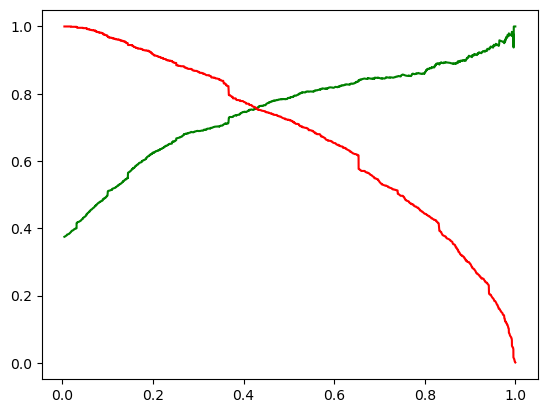

In [154]:
p, r, thresholds = precision_recall_curve(y_pred_final.Converted, y_pred_final.Converted_Prob)

plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Conclusion : 

We have evaluated Sensitivity, Specificity, Precision, and Recall as Metrics.
The best threshold for determining the final prediction is set at 0.37.
Approximately 81% accuracy, 79% sensitivity, and 82% specificity values were observed in the test set, which are all close to each other.
the values obtained through the use of the trained dataset.
- Moreover, the lead score determined in the dataset used for training indicates the conversion rate in the ultimate forecasted model.
approximately 80%
- Therefore, in general, this model appears to be satisfactory.
First and foremost, it is important to identify the top potential customers from the generated leads. The variables 'TotalVisits', 'Total Time Spent on Website', and 'Page Views Per Visit' have the highest impact on the likelihood of a lead being successfully converted.
Pay attention to obtained leads.
Conduct interviews with potential clients to gather the necessary information.
Continue to ask more questions and schedule meetings with the potential customers to understand their willingness and mindset to enroll in online classes.